# 500 Mpc/h 

Here we download and analyse the simulations produced in a simulation box of 500 Mpc/h in each direction. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pickle, os
from glob import glob
from StoReS import * 
import tools21cm as t2c 
from tqdm import tqdm 

## N-body simulation with 500 Mpc/h in each direction

Cosmology of the simulation:

$\Omega_\mathrm{m} = 0.27$, $\Omega_\mathrm{b} = 0.044$, $h_\mathrm{0} = 0.7$, $\sigma_\mathrm{8} = 0.8$, $n_\mathrm{s} = 0.96$

We define the box length and the path to the folder for downloading the data.

In [2]:
box_len  = 500/0.7
save_dir = './work/'
eor_hist = {}

### Density fields - 500 Mpc/h
N-Body (CUBEP3M) snapshots will be downloaded.

In [3]:
dn_url = 'https://ttt.astro.su.se/~gmell/500Mpc/densities/nc300/'
url_dict = {'dens': dn_url}
c2r = C2RAY(work_dir={'dens': save_dir+'density/'}, verbose=False)
c2r.set_links(url_dict)
zs = c2r.zs_dict['dens']
for i,z in tqdm(enumerate(zs)):
    dn, ff = c2r.get_density_data_z(z)
    # os.remove(ff)
print('Data saved in {}'.format(c2r.work_dir['dens']))

74it [00:05, 12.78it/s]

Data saved in ./work/density/


## 500Mpc/h Reionisation Simulation Suite

### C2RMAX10
This simulation models the reionization process assuming spin saturation ($T_{S}\gg T_{CMB}$). is described in See [Georgiev et al. (2022)](https://arxiv.org/abs/2110.13190) the detailed description. 

In [4]:
xf_url = 'https://ttt.astro.su.se/~gmell/500Mpc/500Mpc_z50_0_Rmax10_300/'
dn_url = 'https://ttt.astro.su.se/~gmell/500Mpc/densities/nc300/'
url_dict = {'xfrac': xf_url, 'dens': dn_url, }
c2r = C2RAY(work_dir={'dens': save_dir+'density/', 'xfrac': save_dir+'C2RMAX10/'}, verbose=False)
c2r.set_links(url_dict)
zs = np.intersect1d(c2r.zs_dict['xfrac'], c2r.zs_dict['dens'])
xs = []
for i,z in tqdm(enumerate(zs)):
    # print('{}/{}'.format(i+1,len(zs)))
    data = c2r.get_data_z(z)
    xf = data['xfrac']
    dn = data['dens']
    xs.append(xf.mean())
    # os.remove(data['xfrac_filename'])
    # os.remove(data['dens_filename'])
xs = np.array(xs)
eor_hist['C2RMAX10'] = {'z': zs, 'x': xs}
print('Data saved in {}'.format(c2r.work_dir['xfrac']))

70it [00:12,  5.59it/s]

Data saved in ./work/C2RMAX10/


### C2LLS10
This simulation models the reionization process assuming spin saturation ($T_{S}\gg T_{CMB}$). is described in See [Georgiev et al. (2022)](https://arxiv.org/abs/2110.13190) the detailed description. 

In [5]:
xf_url = 'https://ttt.astro.su.se/~gmell/500Mpc/500Mpc_z50_0_LLS10_300/'
dn_url = 'https://ttt.astro.su.se/~gmell/500Mpc/densities/nc300/'
url_dict = {'xfrac': xf_url, 'dens': dn_url, }
c2r = C2RAY(work_dir={'dens': save_dir+'density/', 'xfrac': save_dir+'C2LLS10/'}, verbose=False)
c2r.set_links(url_dict)
zs = np.intersect1d(c2r.zs_dict['xfrac'], c2r.zs_dict['dens'])
xs = []
for i,z in tqdm(enumerate(zs)):
    data = c2r.get_data_z(z)
    xf = data['xfrac']
    dn = data['dens']
    xs.append(xf.mean())
    # os.remove(data['xfrac_filename'])
    # os.remove(data['dens_filename'])
xs = np.array(xs)
eor_hist['C2LLS10'] = {'z': zs, 'x': xs}
print('Data saved in {}'.format(c2r.work_dir['xfrac']))

56it [00:10,  5.49it/s]

Data saved in ./work/C2LLS10/


## Reionization history of the above simulations

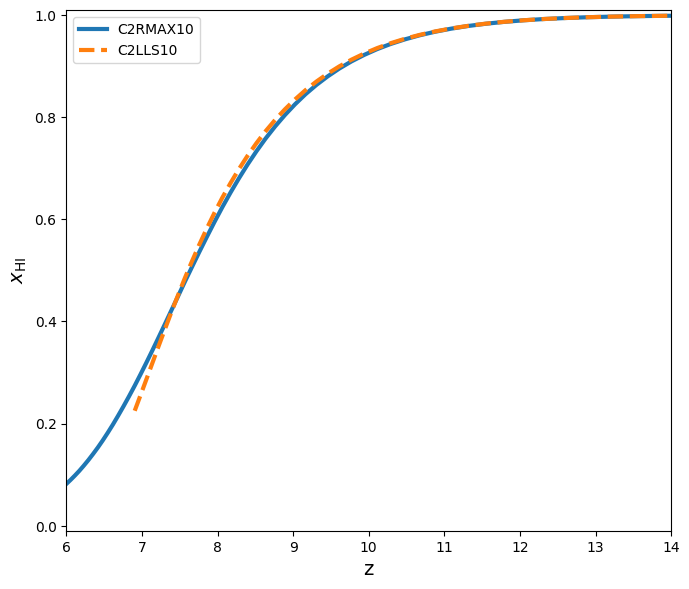

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
# fig.suptitle('Georgiev et al. (2022)')
ax.plot(eor_hist['C2RMAX10']['z'], 1-eor_hist['C2RMAX10']['x'], lw=3, ls='-',  label='C2RMAX10')
ax.plot(eor_hist['C2LLS10']['z'], 1-eor_hist['C2LLS10']['x'], lw=3, ls='--', label='C2LLS10')
ax.set_xlabel('z', fontsize=14)
ax.set_ylabel('$x_\mathrm{HI}$', fontsize=14)
ax.legend()
ax.axis([6,14,-0.01,1.01])
plt.tight_layout()
plt.show()

## Power spectrum at z=6.9 from C2RMAX10

In [7]:
xf_url = 'https://ttt.astro.su.se/~gmell/500Mpc/500Mpc_z50_0_Rmax10_300/'
dn_url = 'https://ttt.astro.su.se/~gmell/500Mpc/densities/nc300/'
url_dict = {'dens': dn_url, 'xfrac': xf_url}

c2r = C2RAY(work_dir={'dens': save_dir+'density/', 'xfrac': save_dir+'C2RMAX10/'})
c2r.set_links(url_dict)
z = 6.905
data = c2r.get_data_z(z)
xf = data['xfrac']
dn = data['dens']


The file already exists.
The file already exists.


In [8]:
dt = t2c.calc_dt(xf, dn, z=z)
ps, ks = t2c.power_spectrum_1d(dt, kbins=20, box_dims=box_len)

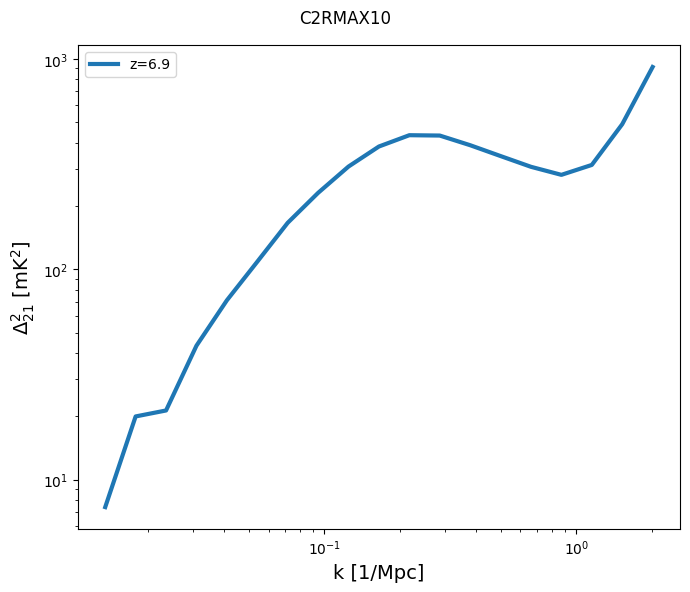

In [9]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
fig.suptitle('C2RMAX10')
ax.loglog(ks, ps*ks**3/2/np.pi**2, lw=3, ls='-',  label='z={:.1f}'.format(z))
ax.set_xlabel('k [1/Mpc]', fontsize=14)
ax.set_ylabel('$\Delta^2_\mathrm{21}$ [mK$^2$]', fontsize=14)
ax.legend()
# ax.axis([6,14,-0.01,1.01])
plt.tight_layout()
plt.show()